# Imports and Functions (run first)
This notebook was written to run on Google Colaboratory

In [132]:
# Imports for all problems
import numpy as np
from sympy import Matrix, latex, Rational, symbols, simplify
import matplotlib.pyplot as plt
from IPython.display import display, Math

def mprint(matrix):
    display(Math(latex(matrix)))

def ansprint(ftext):
    print("*"*35 + "--ANSWER--" + "*"*35 + "\n")
    print(ftext)
    print("\n" + "*"*35 + "--ANSWER--" + "*"*35)

def row_replace(self, x, y, z):
    """
    Replace row x with row_x + y * row_z.
    x: target row index (1st row is 1)
    y: scalar multiplier
    z: source row index (1st row is 1)
    """
    result = self.elementary_row_op(op="n->n+km", row=(x-1), k=y, row1=(z-1))
    return result

def row_scale(self, x, y):
    """
    Scale row x by y
    x: target row index (1st row is 1)
    y: scalar multiplier
    """
    result = self.elementary_row_op(op="n->kn", row=(x-1), k=y)
    return result

def row_switch(self, x, y):
    """
    Swap rows x and y.
    x: first row index (1st row is 1)
    y: second row index (1st row is 1)
    """
    result = self.copy()
    result.row_swap(x-1, y-1)
    return result

# Add row_rep to Matrix class
Matrix.row_replace = row_replace
Matrix.row_scale = row_scale
Matrix.row_switch = row_switch

# Exercise 1

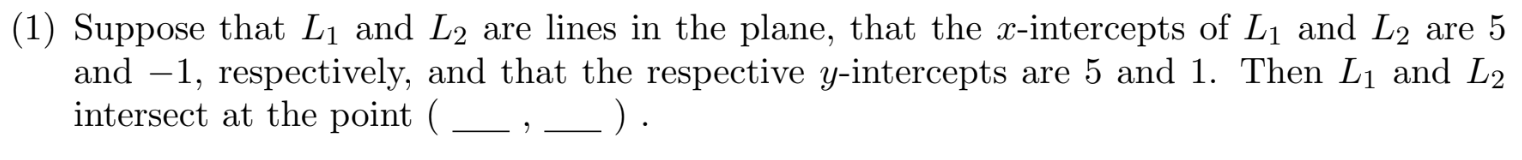

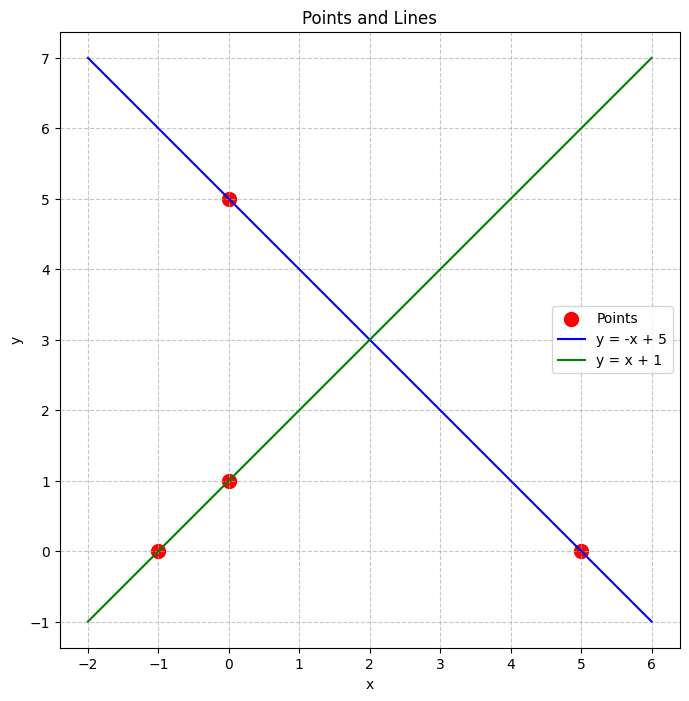

In [ ]:
# Problem 1
# L1 contains the points (5,0) and (0,5), y = mx + b, b=5, m =-5/5 = -1; y = -x + 5
# L2 contains the points (-1,0) and (0,1), b=1, m = -1/-1 = 1, y = x + 1

# plot from grok

# Define the points
points = [(5,0), (0,5), (-1,0), (0,1)]

# Unzip points into x and y coordinates
x_coords, y_coords = zip(*points)

# Create figure and axis
plt.figure(figsize=(8, 8))

# Plot points
plt.scatter(x_coords, y_coords, color='red', s=100, label='Points')

# Plot lines
x = np.linspace(-2, 6, 100)  # Range for x values
y1 = -x + 5  # Line y = -x + 5
y2 = x + 1   # Line y = x + 1

plt.plot(x, y1, 'b-', label='y = -x + 5')
plt.plot(x, y2, 'g-', label='y = x + 1')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Points and Lines')
plt.legend()

# Set equal aspect ratio
plt.axis('equal')

# Show plot
plt.show()

In [ ]:
# solve the system of linear equations
# y = -x + 5,  1 x + 1 y = 5
# y = x + 1,  -1 x + 1 y = 1
a1 = Matrix([[1,1,5],[-1,1,1]])
a1

Matrix([
[ 1, 1, 5],
[-1, 1, 1]])

In [ ]:
rref, pivots = a1.rref()
print(pivots)
rref

(0, 1)


Matrix([
[1, 0, 2],
[0, 1, 3]])

In [4]:
ansprint("From the resulting RREF, L1 and L2 intersect at (2,3), which agrees with the diagram above.")

***********************************--ANSWER--***********************************

From the resulting RREF, L1 and L2 intersect at (2,3), which agrees with the diagram above.

***********************************--ANSWER--***********************************


# Exercise 2

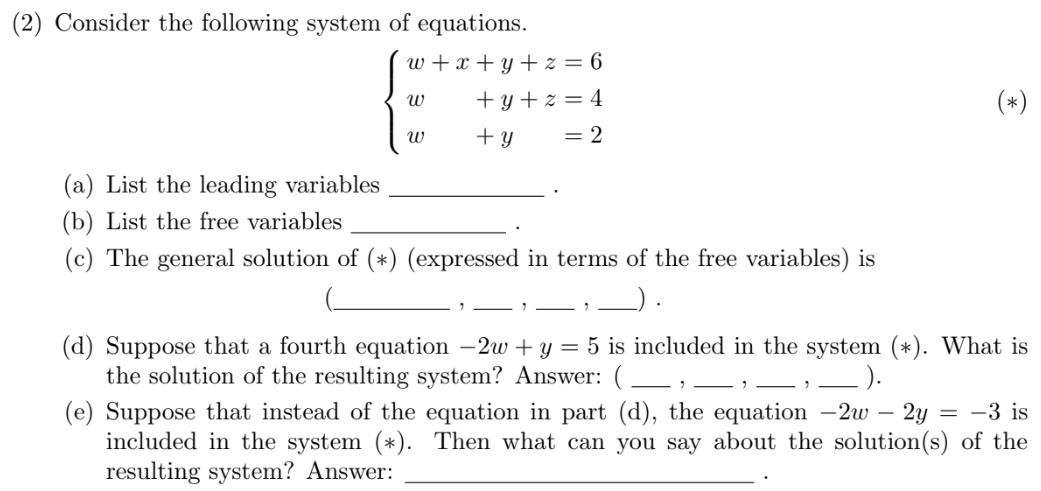

In [8]:
aug2 = Matrix(np.matrix('1 1 1 1 6;1 0 1 1 4;1 0 1 0 2'))
aug2

Matrix([
[1, 1, 1, 1, 6],
[1, 0, 1, 1, 4],
[1, 0, 1, 0, 2]])

In [9]:
rref, pivots = aug2.rref()
print(pivots)
rref

(0, 1, 3)


Matrix([
[1, 0, 1, 0, 2],
[0, 1, 0, 0, 2],
[0, 0, 0, 1, 2]])

In [10]:
ansprint("(a) leading variables are w, x, z\n" +
            "(b) free variable is y");
# particular solution is {2, 2, 0, 2} -- take the last column value for each pivot column, and zero for free variable
# let's confirm this is a particular solution

***********************************--ANSWER--***********************************

(a) leading variables are w, x, z
(b) free variable is y

***********************************--ANSWER--***********************************


In [11]:
a2 = aug2[:,:-1]
mprint(a2)
psol = Matrix(np.matrix('2;2;0;2'))
mprint(psol)
mprint(a2 * psol)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
# use sympy to find the null space(s) -- just one for this problem
nsol = a2.nullspace()[0]
mprint(nsol)

<IPython.core.display.Math object>

In [13]:
# get the RREF of A so I can calculate the null space myself
mprint(a2.rref()[0])

<IPython.core.display.Math object>

In [14]:
# nullspace equations
# w + y = 0
# x = 0
# z = 0
# y is a free variable, so let y = t
# equations in terms of t
# w = -t
# column vector {w,x,y,z} = {-t, 0, t, 0}
# so the null-space vector is t * [-1;0;1;0], which is the same as a2.nullspace() above!

**Answer to Part (c)**

In [15]:
# Print general solution
display(Math(latex(psol) + "+ t*" + latex(nsol)));
ansprint("(c) The general solution expressed in terms of the free variable is (w=2-t, x=2, y=t, z=2)");

<IPython.core.display.Math object>

***********************************--ANSWER--***********************************

(c) The general solution expressed in terms of the free variable is (w=2-t, x=2, y=t, z=2)

***********************************--ANSWER--***********************************


In [16]:
# check for t = 3
gsol3 = psol + 3 * nsol
mprint(gsol3)
mprint(a2 * gsol3) # gives [6;4;2] which is b!

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Part (d)

In [17]:
# add this row: -2w + y = 5
newrow = Matrix(np.matrix('-2 0 1 0 5'))
mprint(newrow)
mprint(aug2)
aug2d = Matrix.vstack(aug2, newrow)
mprint(aug2d)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [18]:
# get rref
rref2, pivots2 = aug2d.rref()
print(pivots)
rref2

(0, 1, 3)


Matrix([
[1, 0, 0, 0, -1],
[0, 1, 0, 0,  2],
[0, 0, 1, 0,  3],
[0, 0, 0, 1,  2]])

In [19]:
# now there is just one solution to the system
sol2d = Matrix(np.matrix('-1;2;3;2'))
display(Math(r'\text{the solution is } ' +latex(sol2d)))
a2d = aug2d[:,:-1]
mprint(a2d)
mprint(a2d * sol2d)
ansprint("(d) the solution is (-1, 2, 3, 2)");

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

***********************************--ANSWER--***********************************

(d) the solution is (-1, 2, 3, 2)

***********************************--ANSWER--***********************************


### Part (e)

In [20]:
# add this row: -2w - 2y = -3
newrow = Matrix(np.matrix('-2 0 -2 0 -3'))
mprint(newrow)
mprint(aug2)
aug2e = Matrix.vstack(aug2, newrow)
mprint(aug2e)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [22]:
# get rref
rref2e, pivots2e = aug2e.rref()
print(pivots)
rref2e
ansprint("(e) RREF contains a contradictary row (last one) so there are no solutions");

(0, 1, 3)
***********************************--ANSWER--***********************************

(e) RREF contains a contradictary row (last one) so there are no solutions

***********************************--ANSWER--***********************************


# Exercise 3

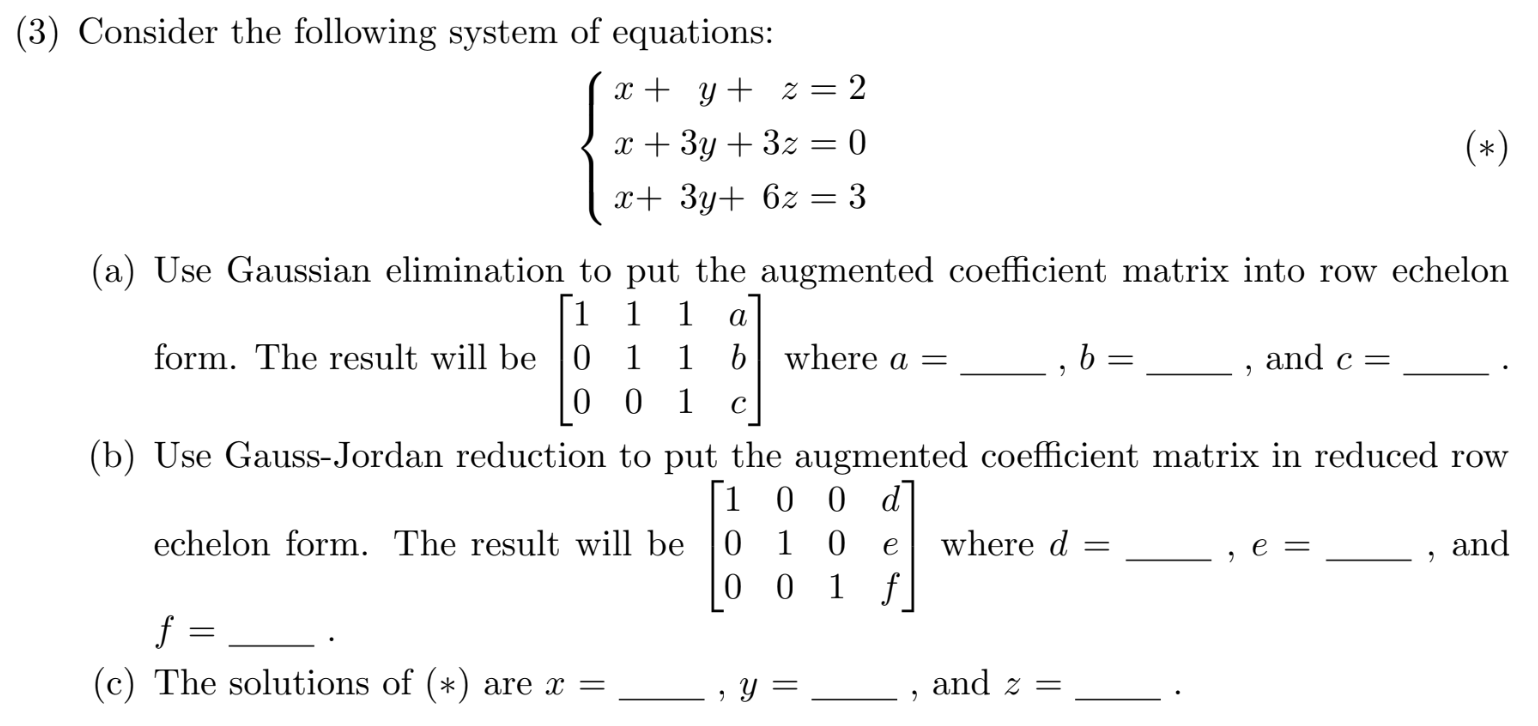

In [23]:
A3 = Matrix(np.matrix('1 1 1 2;1 3 3 0;1 3 6 3'))
mprint(A3)

<IPython.core.display.Math object>

In [24]:
# subtrace row 2 from from 3
A3a = A3.row_replace(3, -1, 2); A3a

Matrix([
[1, 1, 1, 2],
[1, 3, 3, 0],
[0, 0, 3, 3]])

In [25]:
# subtrace row 1 from from 2
A3b = A3a.row_replace(2, -1, 1); A3b

Matrix([
[1, 1, 1,  2],
[0, 2, 2, -2],
[0, 0, 3,  3]])

In [26]:
# scale row 2 by 1/2
A3c = A3b.row_scale(2, Rational(1,2)); A3c

Matrix([
[1, 1, 1,  2],
[0, 1, 1, -1],
[0, 0, 3,  3]])

In [27]:
# scale row 3 by 1/3
A3d = A3c.row_scale(3, Rational(1,3)); A3d

Matrix([
[1, 1, 1,  2],
[0, 1, 1, -1],
[0, 0, 1,  1]])

In [28]:
ansprint("(a): a = 2, b = -1, c = 1");

***********************************--ANSWER--***********************************

(a): a = 2, b = -1, c = 1

***********************************--ANSWER--***********************************


### part (b)

In [ ]:
# subtract row 2 from row 1
A3e = A3d.row_replace(1, -1, 2); A3e

Matrix([
[1, 0, 0,  3],
[0, 1, 1, -1],
[0, 0, 1,  1]])

In [ ]:
# subtract row 3 from row 2
A3f = A3e.row_replace(2, -1, 3); A3f

Matrix([
[1, 0, 0,  3],
[0, 1, 0, -2],
[0, 0, 1,  1]])

In [29]:
ansprint("Answer for part (b): d = 3, e = -2, f = 1\n" +
"And the same for part (c): x = 3, y = -2, z = 1");

***********************************--ANSWER--***********************************

Answer for part (b): d = 3, e = -2, f = 1
And the same for part (c): x = 3, y = -2, z = 1

***********************************--ANSWER--***********************************


In [ ]:
# double check the rref
A3.rref()[0]

Matrix([
[1, 0, 0,  3],
[0, 1, 0, -2],
[0, 0, 1,  1]])

# Exercise 4

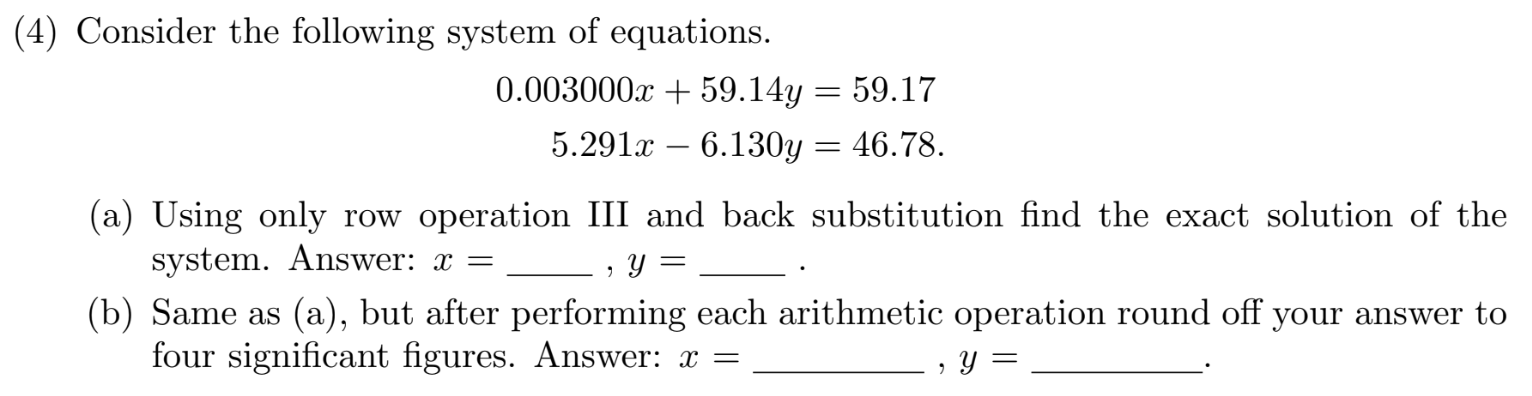

In [30]:
# so, is he saying to do it with Rational?
A4 = Matrix([[Rational(3,1000), Rational(5914,100), Rational(5917,100)],
             [Rational(5291,1000), Rational(-6130,1000), Rational(4678,100)]])
A4

Matrix([
[   3/1000,  2957/50, 5917/100],
[5291/1000, -613/100,  2339/50]])

In [31]:
# Why can't I use type I? Is the point to see how floating point differs from Rational()?
x = Rational(5291,1000) / Rational(3,1000)
x

5291/3

In [32]:
A4a = A4.row_replace(2, Rational(-5291,3), 1); A4a

Matrix([
[3/1000,       2957/50,      5917/100],
[     0, -31292813/300, -31292813/300]])

In [33]:
# OK, cool, y = 1
y = 1
# I can substitute that into the first equation to get x = (59.17 - 59.14)/0.003
x = (Rational(5917,100)-Rational(5914,100))/Rational(3,1000)
x

10

In [36]:
ansprint(f"Answer for (a) is x = {x}, y = {y}")

***********************************--ANSWER--***********************************

Answer for (a) is x = 10, y = 1

***********************************--ANSWER--***********************************


In [37]:
# let's do it with floating point math, rounding to 4 decimal places
A4_float = Matrix(np.matrix('0.003 59.14 59.17;5.291, -6.13, 46.78'))
A4_float

Matrix([
[0.003, 59.14, 59.17],
[5.291, -6.13, 46.78]])

In [38]:
sf = 5.291/0.003; sf

1763.6666666666667

In [39]:
# do row replace with scaling factor rounded to 4 decimal places
A4_float_a = A4_float.row_replace(2, -1763.6667, 1)
mprint(A4_float_a)
print(A4_float_a)

<IPython.core.display.Math object>

Matrix([[0.00300000000000000, 59.1400000000000, 59.1700000000000], [-9.99999993922529e-8, -104309.378638000, -104309.378639000]])


In [40]:
yf = -104309.378639000 / -104309.378638000
yf

1.000000000009587

In [41]:
xf = (59.17 - (59.14 * 1.000000000009587)) / 0.003
xf

9.999999811007854

In [42]:
ansprint(f"Answer for (b) is x = {xf}, y = {yf}")

***********************************--ANSWER--***********************************

Answer for (b) is x = 9.999999811007854, y = 1.000000000009587

***********************************--ANSWER--***********************************


# Exercise 5

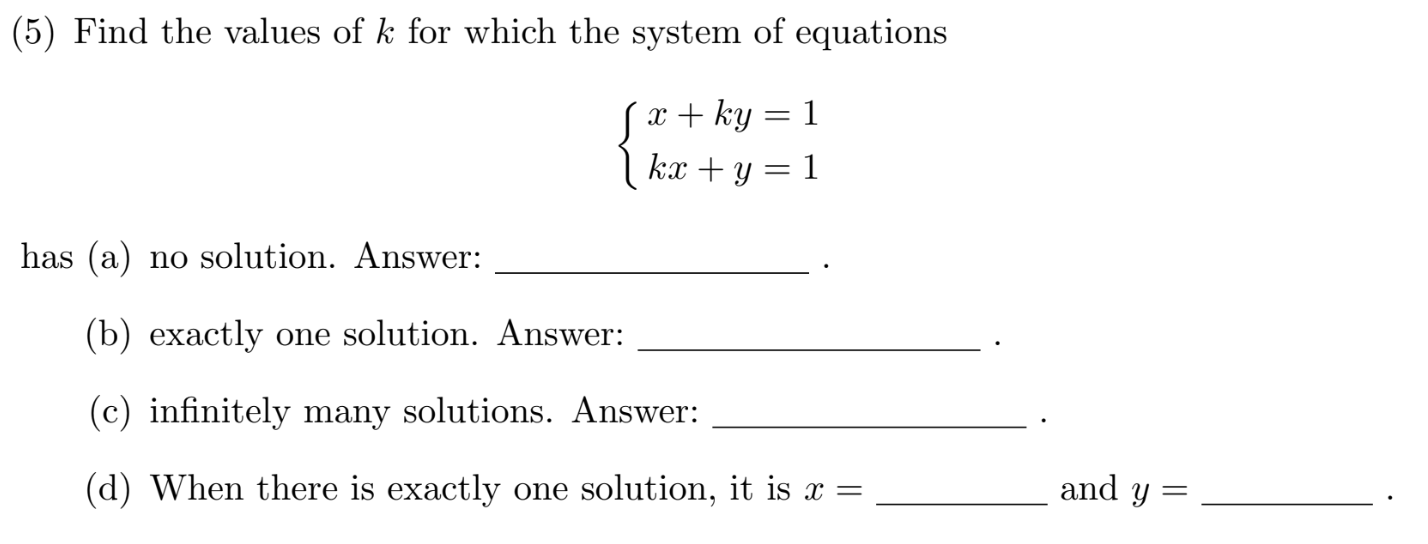

In [43]:
# How to tell how many solution:
# Solutions     Free Var    Rank        Cont Row
# ---------     --------    ------      --------
# One Unique      none      Ab = A      none
# No Solutions     >0       Ab > A      yes
# Infinite         >0       A < vars    none

k = 0
A5 = Matrix([[1,k],[k,1]])
b5 = Matrix([[1],[1]])
Aug5 = Matrix.hstack(A5,b5)
mprint(Aug5)

<IPython.core.display.Math object>

In [44]:
def check_it(k):
    A5 = Matrix([[1,k],[k,1]])
    b5 = Matrix([[1],[1]])
    Aug5 = Matrix.hstack(A5,b5)
    rref, pivots = Aug5.rref()
    #mprint(rref)
    num_piv = len(pivots)
    #print(f"pivots: {pivots}, n = {num_piv}")
    num_var = A5.cols
    num_free = num_var - num_piv
    #print(f"Number of free variable = {num_free}")
    #print(f"Rank of A = {A5.rank()}, Rank of Ab = {Aug5.rank()}")
    # check each row for contradiction (all zeros)
    has_contra = False
    for row in rref.tolist():
        if all(x==0 for x in row[0:-1]) and row[-1] > 0:
            has_contra = True
    #print("RREF has contradictory row:", has_contra)

    # number of solutions
    if num_free == 0 and A5.rank() == Aug5.rank() and has_contra == False:
        answer = "One Unique"
    elif Aug5.rank() > A5.rank() and has_contra == True:
        answer = "No Solutions"
    elif num_free > 0 and A5.rank() < num_var and has_contra == False:
        answer = "Infinite Solutions"
    else:
        answer = "Couldn't figure it out!"
    print(f"{k}\t{num_free}\t\t{Aug5.rank()}, {A5.rank()}, {num_var}\t\t{has_contra}\t\t{answer}")

print(f"k\tFree Var\tAb, A, vars\tCont Row\t# Solutions")
for k in np.arange(-2, 2.1, 0.5):
    check_it(round(k,2))


k	Free Var	Ab, A, vars	Cont Row	# Solutions
-2.0	0		2, 2, 2		False		One Unique
-1.5	0		2, 2, 2		False		One Unique
-1.0	0		2, 1, 2		True		No Solutions
-0.5	0		2, 2, 2		False		One Unique
0.0	0		2, 2, 2		False		One Unique
0.5	0		2, 2, 2		False		One Unique
1.0	1		1, 1, 2		False		Infinite Solutions
1.5	0		2, 2, 2		False		One Unique
2.0	0		2, 2, 2		False		One Unique


In [45]:
ansprint("a) no solution when k = -1\n" +
"b) one solution when k != -1 and k != 1\n" +
"c) infinite solutions when k = 1\n" +
# working through k=2 below, I figured out the pattern for x, y
"d) when one solution, x = y = 1/(1+k)");


***********************************--ANSWER--***********************************

a) no solution when k = -1
b) one solution when k != -1 and k != 1
c) infinite solutions when k = 1
d) when one solution, x = y = 1/(1+k)

***********************************--ANSWER--***********************************


In [46]:
k = 2
A5 = Matrix([[1,k],[k,1]])
b5 = Matrix([[1],[1]])
Aug5 = Matrix.hstack(A5,b5)
Aug5

Matrix([
[1, 2, 1],
[2, 1, 1]])

In [47]:
n2 = Aug5.row_replace(2, -2, 1);n2

Matrix([
[1,  2,  1],
[0, -3, -1]])

In [48]:
n3 = n2.row_scale(2, Rational(-1,3));n3

Matrix([
[1, 2,   1],
[0, 1, 1/3]])

In [49]:
n4 = n3.row_replace(1, -2, 2); n4

Matrix([
[1, 0, 1/3],
[0, 1, 1/3]])

In [50]:
# print sympy rref
Aug5.rref()[0]

Matrix([
[1, 0, 1/3],
[0, 1, 1/3]])

# Exercise 6

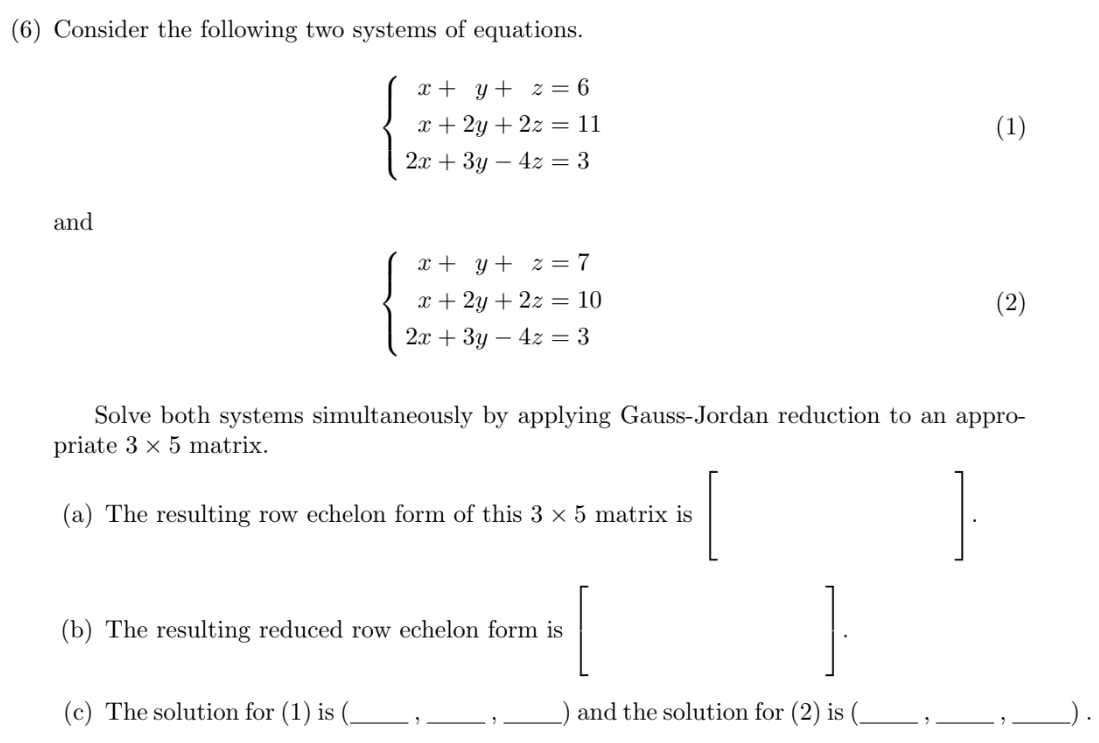

In [51]:
# augmented matrix with have one A and two b's
A6 = Matrix(np.matrix('1 1 1;1 2 2;2 3 -4'))
b1 = Matrix(np.matrix('6;11;3'))
b2 = Matrix(np.matrix('7;10;3'))
Aug6 = Matrix.hstack(A6, b1, b2)
Aug6

Matrix([
[1, 1,  1,  6,  7],
[1, 2,  2, 11, 10],
[2, 3, -4,  3,  3]])

In [52]:
n6a = Aug6.row_replace(3, -2, 1); n6a

Matrix([
[1, 1,  1,  6,   7],
[1, 2,  2, 11,  10],
[0, 1, -6, -9, -11]])

In [53]:
n6b = n6a.row_replace(2, -1, 1); n6b

Matrix([
[1, 1,  1,  6,   7],
[0, 1,  1,  5,   3],
[0, 1, -6, -9, -11]])

In [54]:
n6c = n6b.row_replace(3, -1, 2); n6c

Matrix([
[1, 1,  1,   6,   7],
[0, 1,  1,   5,   3],
[0, 0, -7, -14, -14]])

In [61]:
n6d = n6c.row_scale(3, Rational(-1,7))
mprint(n6d)
ansprint("(a) the row echelon form of the 3x5 matrix is above.")

<IPython.core.display.Math object>

***********************************--ANSWER--***********************************

(a) the row echelon form of the 3x5 matrix is above.

***********************************--ANSWER--***********************************


In [62]:
n6e = n6d.row_replace(1, -1, 2); n6e

Matrix([
[1, 0, 0, 1, 4],
[0, 1, 1, 5, 3],
[0, 0, 1, 2, 2]])

In [63]:
n6f = n6e.row_replace(2, -1, 3)
mprint(n6f)
print("(b) the RREF of the 3x5 matrix is above.")

<IPython.core.display.Math object>

(b) the RREF of the 3x5 matrix is above.


In [64]:
# check with sympy
Aug6.rref()[0]

Matrix([
[1, 0, 0, 1, 4],
[0, 1, 0, 3, 1],
[0, 0, 1, 2, 2]])

In [68]:
ansprint(f"(c) the solution for (1) is ({n6f[0,3]}, {n6f[1,3]}, {n6f[2,3]}) and\n" +
    f"    the solution for (2) is ({n6f[0,4]}, {n6f[1,4]}, {n6f[2,4]})");

***********************************--ANSWER--***********************************

(c) the solution for (1) is (1, 3, 2) and
    the solution for (2) is (4, 1, 2)

***********************************--ANSWER--***********************************


# Exercise 7

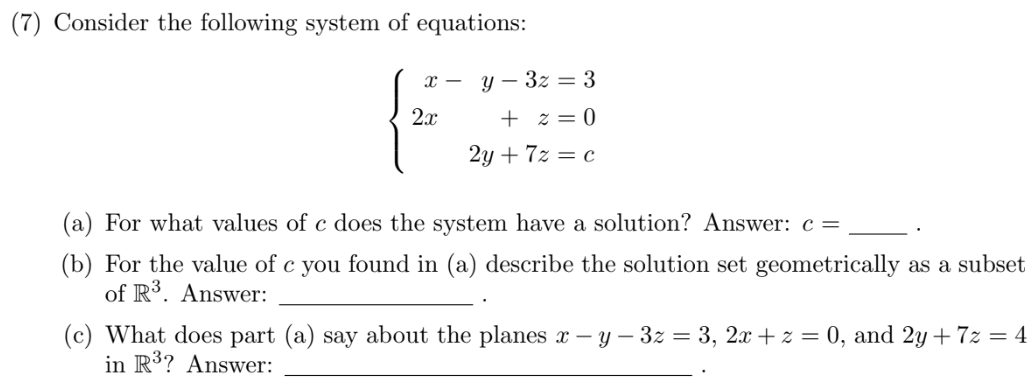

In [69]:
# compute the echelon form with variable c
c = symbols('c')
A7 = Matrix([[1,-1,-3, 3],
             [2, 0, 1, 0],
             [0, 2, 7, c]]);
mprint(A7)
mprint(A7.rref()[0])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [70]:
n7a = A7.row_scale(3, Rational(1,2)); n7a

Matrix([
[1, -1,  -3,   3],
[2,  0,   1,   0],
[0,  1, 7/2, c/2]])

In [71]:
n7a.row_swap(1,2); n7a # don't run twice!

Matrix([
[1, -1,  -3,   3],
[0,  1, 7/2, c/2],
[2,  0,   1,   0]])

In [72]:
n7b = n7a.row_replace(3, -2, 1); n7b

Matrix([
[1, -1,  -3,   3],
[0,  1, 7/2, c/2],
[0,  2,   7,  -6]])

In [73]:
n7c = n7b.row_replace(3, -2, 2); n7c

Matrix([
[1, -1,  -3,      3],
[0,  1, 7/2,    c/2],
[0,  0,   0, -c - 6]])

In [74]:
A7_soln = Matrix([[1,-1,-3, 3],
             [2, 0, 1, 0],
             [0, 2, 7, -6]]);
mprint(A7_soln)
print()
mprint(A7_soln.rref()[0])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [75]:
ansprint("(a) the system has a solution for c = -6 (no contradictory row)")

***********************************--ANSWER--***********************************

(a) the system has a solution for c = -6 (no contradictory row)

***********************************--ANSWER--***********************************


In [77]:
ansprint("(b) the solution set describes a line of the form shown in the plot below:")

***********************************--ANSWER--***********************************

(b) the solution set describes a line of the form shown in the plot below:

***********************************--ANSWER--***********************************


In [78]:
import numpy as np
import plotly.graph_objects as go

# Define the parameter t
t = np.linspace(-5, 5, 100)  # t varies from -5 to 5

# Parametric equations
x = -0.5 * t          # x = -1/2 * t
y = -3 - 3.5 * t      # y = -3 - 7/2 * t
z = t                 # z = t

# Create a 3D line plot
fig = go.Figure(data=[go.Scatter3d(
    x=x, y=y, z=z,
    mode='lines',
    line=dict(color='blue', width=4),
    name='x=-t/2, y=-3-7t/2, z=t'
)])

# Set identical ranges for all axes
axis_range = [-21, 15]  # Slightly padded to match Y's range and ensure symmetry

# Update layout for axes labels, title, and equal ranges
fig.update_layout(
    scene=dict(
        xaxis=dict(title='X', range=axis_range),
        yaxis=dict(title='Y', range=axis_range),
        zaxis=dict(title='Z', range=axis_range),
        aspectmode='cube'  # Ensures equal scaling
    ),
    title='Interactive 3D Parametric Line with Equal Axis Ranges',
    showlegend=True,
    width=800,
    height=600
)

# Show the plot
fig.show()

In [79]:
ansprint("(c) For the case where c = 4, the three equations represent planes where the three do not intersect at any point.")

***********************************--ANSWER--***********************************

(c) For the case where c = 4, the three equations represent planes where the three do not intersect at any point.

***********************************--ANSWER--***********************************


# Exercise 8

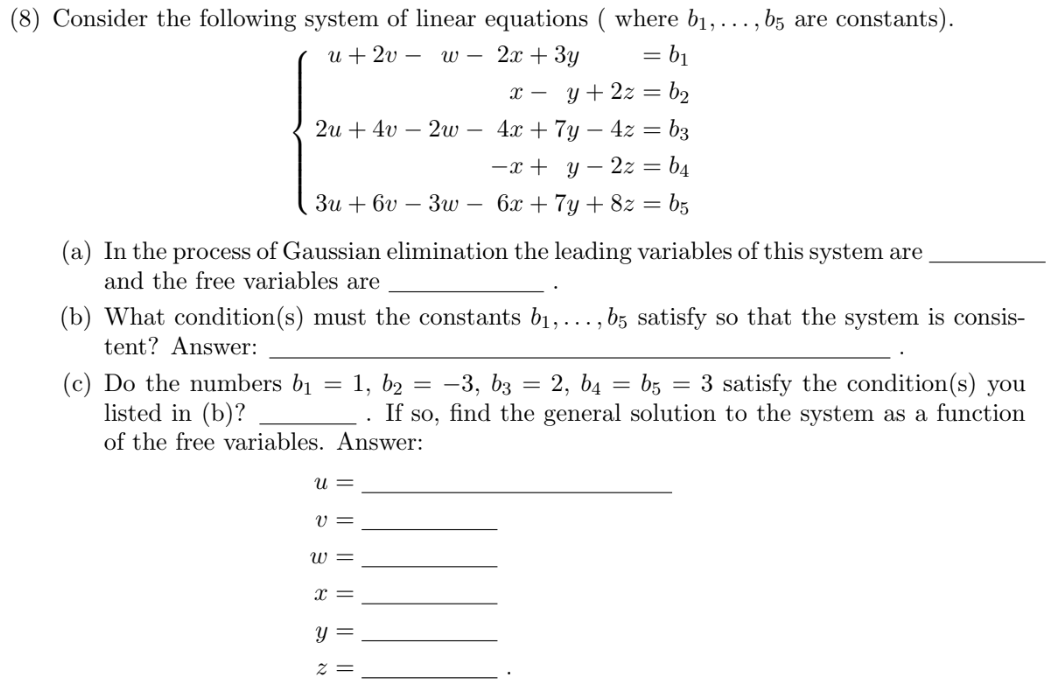

In [88]:
b1, b2, b3, b4, b5 = symbols(('b1', 'b2', 'b3', 'b4', 'b5'))
A8 = Matrix([[1, 2,-1,-2, 3, 0, b1],
             [0, 0, 0, 1,-1, 2, b2],
             [2, 4,-2,-4, 7,-4, b3],
             [0, 0, 0,-1, 1,-2, b4],
             [3, 6,-3,-6, 7, 8, b5]])
mprint(A8)

<IPython.core.display.Math object>

In [89]:
# sympy rref doesn't handle the variables--gotta do it myself
A8.rref()[0]

Matrix([
[1, 2, -1, 0, 0,  8, 0],
[0, 0,  0, 1, 0, -2, 0],
[0, 0,  0, 0, 1, -4, 0],
[0, 0,  0, 0, 0,  0, 1],
[0, 0,  0, 0, 0,  0, 0]])

In [90]:
n8b = A8.row_replace(5, -3, 1); n8b

Matrix([
[1, 2, -1, -2,  3,  0,         b1],
[0, 0,  0,  1, -1,  2,         b2],
[2, 4, -2, -4,  7, -4,         b3],
[0, 0,  0, -1,  1, -2,         b4],
[0, 0,  0,  0, -2,  8, -3*b1 + b5]])

In [91]:
n8c = n8b.row_replace(3, -2, 1); n8c

Matrix([
[1, 2, -1, -2,  3,  0,         b1],
[0, 0,  0,  1, -1,  2,         b2],
[0, 0,  0,  0,  1, -4, -2*b1 + b3],
[0, 0,  0, -1,  1, -2,         b4],
[0, 0,  0,  0, -2,  8, -3*b1 + b5]])

In [92]:
n8d = n8c.row_replace(4, 1, 2); n8d

Matrix([
[1, 2, -1, -2,  3,  0,         b1],
[0, 0,  0,  1, -1,  2,         b2],
[0, 0,  0,  0,  1, -4, -2*b1 + b3],
[0, 0,  0,  0,  0,  0,    b2 + b4],
[0, 0,  0,  0, -2,  8, -3*b1 + b5]])

In [93]:
n8e = n8d.row_replace(5, 2, 3); n8e

Matrix([
[1, 2, -1, -2,  3,  0,                b1],
[0, 0,  0,  1, -1,  2,                b2],
[0, 0,  0,  0,  1, -4,        -2*b1 + b3],
[0, 0,  0,  0,  0,  0,           b2 + b4],
[0, 0,  0,  0,  0,  0, -7*b1 + 2*b3 + b5]])

In [94]:
ansprint(f"""(a) In the process of Gaussian elimination the leading variables of this system are
            u, x, y and the free variables are v, w, z.""")

***********************************--ANSWER--***********************************

(a) In the process of Gaussian elimination the leading variables of this system are
            u, x, y and the free variables are v, w, z.

***********************************--ANSWER--***********************************


In [95]:
ansprint("""(b) What condition(s) must the constants b1, . . . , b5 satisfy
        so that the system is consistent?
        Answer: b2 + b4 = 0, -7*b1 + 2*b3 + b5 = 0""")

***********************************--ANSWER--***********************************

(b) What condition(s) must the constants b1, . . . , b5 satisfy
        so that the system is consistent?
        Answer: b2 + b4 = 0, -7*b1 + 2*b3 + b5 = 0

***********************************--ANSWER--***********************************


In [96]:
ansprint(f"(c) Do the numbers b1 = 1, b2 = −3, b3 = 2, b4 = b5 = 3 satisfy the\n"
            f"condition(s) you listed in (b)? "
            f"{(-3 + 3 == 0)}, {(-7*1 + 2*2 + 3 == 0)}");

***********************************--ANSWER--***********************************

(c) Do the numbers b1 = 1, b2 = −3, b3 = 2, b4 = b5 = 3 satisfy the
condition(s) you listed in (b)? True, True

***********************************--ANSWER--***********************************


In [97]:
# free variable assignments: v = R, w = S, z = T

In [98]:
# make real matrix with actual numbers
real_b = Matrix(np.matrix('1;-3;2;3;3'))
A8real = Matrix.hstack(A8[:,:-1], real_b)
A8real

Matrix([
[1, 2, -1, -2,  3,  0,  1],
[0, 0,  0,  1, -1,  2, -3],
[2, 4, -2, -4,  7, -4,  2],
[0, 0,  0, -1,  1, -2,  3],
[3, 6, -3, -6,  7,  8,  3]])

In [99]:
A8real.rref()[0]

Matrix([
[1, 2, -1, 0, 0,  8, -5],
[0, 0,  0, 1, 0, -2, -3],
[0, 0,  0, 0, 1, -4,  0],
[0, 0,  0, 0, 0,  0,  0],
[0, 0,  0, 0, 0,  0,  0]])

In [101]:
# u + 2v -w + 8z = -5   --> u + 2R -S + 8T = -5
# x - 2z = -3           --> x - 2T = -3
# y - 4z = 0            --> y - 4T = 0
# solving for u, x & y
# u = -5 - 2R + S - 8T
# v = R
# w = S
# x = -3 + 2T
# y = 4T
# z = T
ansprint("""(c) find the general solution to the system as a function of the free variables.
             Answer:    # u = -5 - 2R + S - 8T
                        # v = R
                        # w = S
                        # x = -3 + 2T
                        # y = 4T
                        # z = T""")

***********************************--ANSWER--***********************************

(c) find the general solution to the system as a function of the free variables.
             Answer:    # u = -5 - 2R + S - 8T
                        # v = R
                        # w = S
                        # x = -3 + 2T
                        # y = 4T
                        # z = T

***********************************--ANSWER--***********************************


# Exercise 9

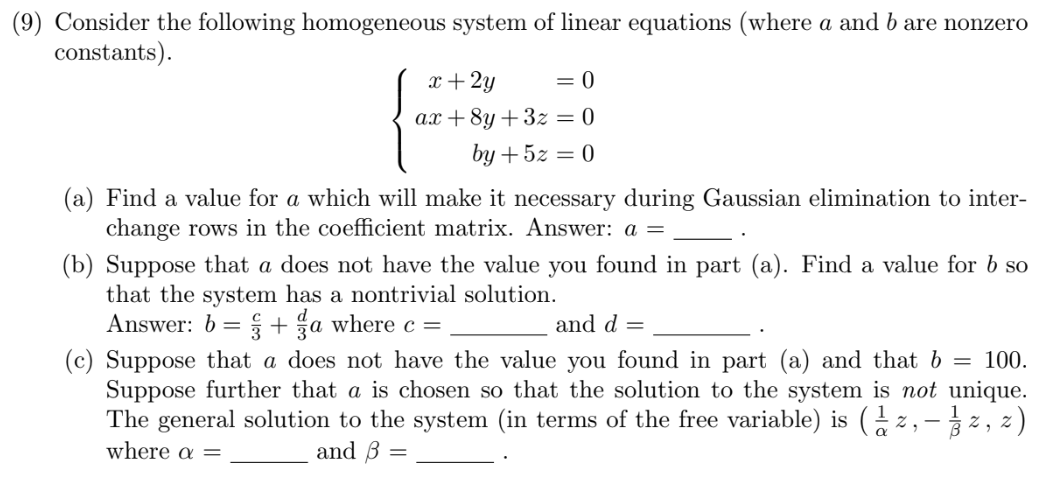

In [102]:
a, b = symbols(('a', 'b'))
a = 4
A9 = Matrix([[1, 2, 0, 0],
             [a, 8, 3, 0],
             [0, b, 5, 0]])
mprint(A9)

<IPython.core.display.Math object>

In [103]:
a9b = A9.row_replace(2, -4, 1); a9b

Matrix([
[1, 2, 0, 0],
[0, 0, 3, 0],
[0, b, 5, 0]])

In [104]:
a9c = a9b.row_switch(2, 3); a9c

Matrix([
[1, 2, 0, 0],
[0, b, 5, 0],
[0, 0, 3, 0]])

In [105]:
ansprint("(a) When a=4, it becomes necessary to interchange rows to get to the echelon form")

***********************************--ANSWER--***********************************

(a) When a=4, it becomes necessary to interchange rows to get to the echelon form

***********************************--ANSWER--***********************************


In [106]:
# part b
# if a homogeneous system of equations has a non-trivial solution, it must contain free variables
a, b = symbols(('a', 'b'))
a = 0
b = Rational(40,3)
A9b = Matrix([[1, 2, 0, 0],
             [a, 8, 3, 0],
             [0, b, 5, 0]])
mprint(A9b)
print()
A9b.rref()[0]

<IPython.core.display.Math object>

Matrix([
[1, 0, -3/4, 0],
[0, 1,  3/8, 0],
[0, 0,    0, 0]])

In [107]:
# pivots are x, y, free variable is z
# b = c/3 + d/3*a
# when a = 0, b = 40/3, so c = 40

In [108]:
# part b
# if a homogeneous system of equations has a non-trivial solution, it must contain free variables
a, b = symbols(('a', 'b'))
a = 1
b = 10
A9b = Matrix([[1, 2, 0, 0],
             [a, 8, 3, 0],
             [0, b, 5, 0]])
mprint(A9b)

<IPython.core.display.Math object>

In [109]:
# for a = 1, get 2nd row as pivot row for y
nn9 = A9b.row_replace(2, -1, 1); nn9

Matrix([
[1,  2, 0, 0],
[0,  6, 3, 0],
[0, 10, 5, 0]])

In [110]:
nn9.rref()[0]

Matrix([
[1, 0,  -1, 0],
[0, 1, 1/2, 0],
[0, 0,   0, 0]])

In [111]:
# when a = 1, b = 10
# so 10 = 40/3 + d/3*1, so d = -10
ansprint("(b) c = 40, d = -10")

***********************************--ANSWER--***********************************

(b) c = 40, d = -10

***********************************--ANSWER--***********************************


In [112]:
# (c) b = 100, so 100 = 40/3 - 10/3*a, so a = -24
# 300/3 - 40/3 = -10/3*a
# 260/3 = -10/3*a
# 260 = -10*a
# -26 = a
40/3 - 10/3 * (-26)

100.0

In [113]:
a, b = symbols(('a', 'b'))
a = -26
b = 100
A9c = Matrix([[1, 2, 0, 0],
             [a, 8, 3, 0],
             [0, b, 5, 0]])
mprint(A9c)

<IPython.core.display.Math object>

In [114]:
A9c.rref()[0]

Matrix([
[1, 0, -1/10, 0],
[0, 1,  1/20, 0],
[0, 0,     0, 0]])

In [115]:
# x -1/10*z = 0     --> x = 1/10 * z
# y + 1/20*z = 0    --> y = -1/20 * z
# z = z
ansprint("(c) alpha = 10, beta = 20")

***********************************--ANSWER--***********************************

(c) alpha = 10, beta = 20

***********************************--ANSWER--***********************************


# Problem 1

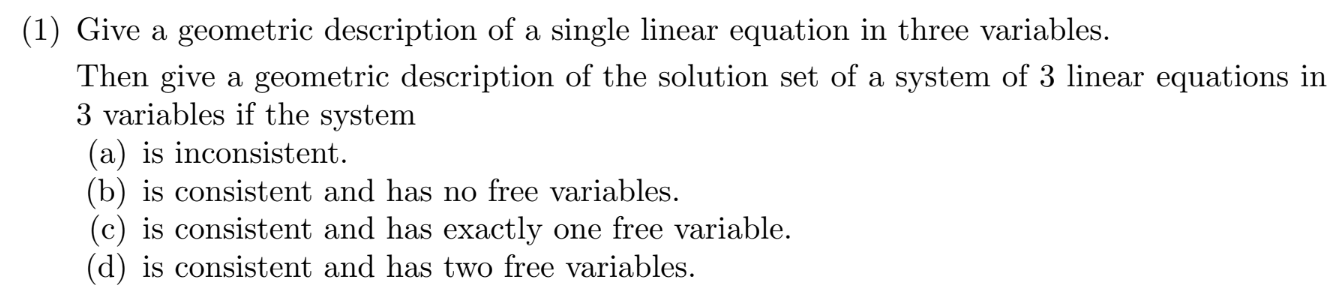

A single linear equation in three variables would have 3 constants and a result, e.g. ax + by + cz = d, where a, b, c and d are all constants. It represents a plane in 3d space.

For a set of three linear equations (three planes), if it is:  
(a) inconsistent, then the three planes never intersect in a point, line or plane (at least two of the planes are parallel or each pair of planes intersect in a line but the lines do not intersect)  
(b) is consistent and has no free variables, then the three planes intersect in a point  
(c) is consistent and has exactly one free variable, then the planes intersect in a line  
(d) is consistent and has two free variables, then the plans intersect in a plane (the system is reduced to a single equation and they are all linearly dependent)

# Problem 2

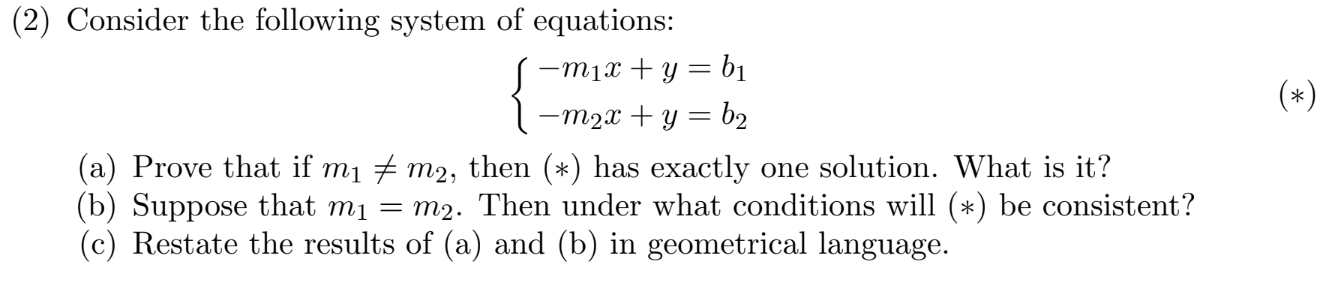

These two equations represent lines:  
y = m1 * x + b1  
y = m2 * x + b2  
  
(a) if m1 and m2 are different, they have different slopes so they must intersect at some point and that intersection is the one solution.  
(The equation for the solution is below)  
(b) If m1 = m2, the equations will be consistent (has one or more solutions) only when b1 = b2.  
(c) m1 != m2 are intersecting lines. m1 = m2 and consistent means they are the same line with the same slope and the same y-intercept.

In [118]:
# intersection of two lines solved with gaussian elimination
m1, b1, m2, b2 = symbols(('m1', 'b1', 'm2', 'b2'));
A = Matrix([[-m1, 1, b1], [-m2, 1, b2]]);
A

Matrix([
[-m1, 1, b1],
[-m2, 1, b2]])

In [123]:
naa = A.row_scale(1, -1/m1); naa

Matrix([
[  1, -1/m1, -b1/m1],
[-m2,     1,     b2]])

In [124]:
nab = naa.row_replace(2, m2, 1); nab

Matrix([
[1,     -1/m1,         -b1/m1],
[0, 1 - m2/m1, -b1*m2/m1 + b2]])

In [127]:
nac = nab.row_scale(2, 1/(1-m2/m1)); nac

Matrix([
[1, -1/m1,                       -b1/m1],
[0,     1, (-b1*m2/m1 + b2)/(1 - m2/m1)]])

In [129]:
nad = nac.row_replace(1, 1/m1, 2); nad

Matrix([
[1, 0, -b1/m1 + (-b1*m2/m1 + b2)/(m1*(1 - m2/m1))],
[0, 1,               (-b1*m2/m1 + b2)/(1 - m2/m1)]])

In [135]:
nad[0,2]


-b1/m1 + (-b1*m2/m1 + b2)/(m1*(1 - m2/m1))

In [138]:
xexp = simplify(nad[0,2])
xexp

(-b1 + b2)/(m1 - m2)

In [136]:
nad[1,2]

(-b1*m2/m1 + b2)/(1 - m2/m1)

In [139]:
yexp = simplify(nad[1,2])
yexp

(-b1*m2 + b2*m1)/(m1 - m2)

In [158]:
ansprint("(a) answer to the second part:")
print()
display(Math("x = " + latex(xexp) + ",\ y = " + latex(yexp)));

***********************************--ANSWER--***********************************

(a) answer to the second part:

***********************************--ANSWER--***********************************



<IPython.core.display.Math object>

Grok's answer
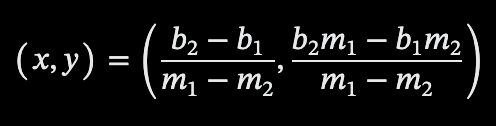